# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.sparse as sps
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregando os dados

In [3]:
start = time.time()
vetor_train_target = sps.load_npz('data/sparse_matrix_train_target_small.npz').tocsr()
matriz_train       = sps.load_npz('data/sparse_matrix_train_small.npz').tocsr()
matriz_test        = sps.load_npz('data/sparse_matrix_test_small.npz' ).tocsr()
end = time.time()


print('Tempo de carregamento das Matrizes: '+str("%.2f" % (end - start))+'s\n')


Tempo de carregamento das Matrizes: 0.23s



# Avaliando regressor linear

Tempo de processamento do regressor linear: 41.21s



RMSE MEAN:  0.2635
RMSE STD:   0.0106




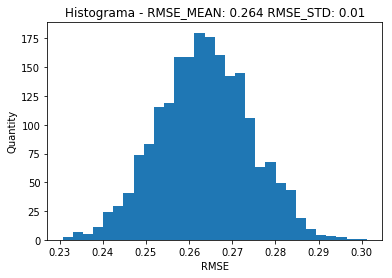

In [3]:
from sklearn.linear_model import LinearRegression
start = time.time()

def regressao_linear():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

    # Criando Regressor Linear
    regr = LinearRegression(n_jobs = -1)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(2000):
    rmse = regressao_linear()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor linear: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor Ridge

Tempo de processamento do regressor ridge: 24.02s



RMSE MEAN:  0.2492
RMSE STD:   0.0119




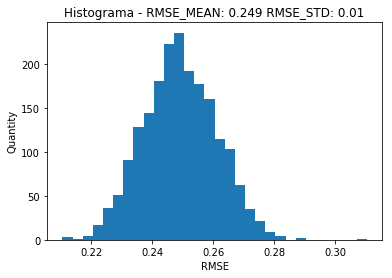

In [14]:
from sklearn.linear_model import Ridge
start = time.time()

def regressao_ridge():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

    # Criando Regressor Linear
    regr = Ridge(alpha = 29.0)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(2000):
    rmse = regressao_ridge()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor ridge: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor GradientBoosting

Tempo de processamento do GradientBoostingRegressor : 190.88s



RMSE MEAN:  0.2580
RMSE STD:   0.0124




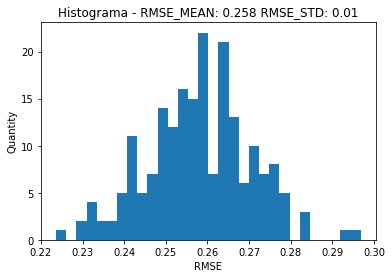

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

start = time.time()

def regressao_gradient_boosting():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

    # Criando Regressor Linear
    regr = GradientBoostingRegressor(learning_rate = 0.01)

    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 200 vezes através de amostras aleatórias
for i in range(200):
    rmse = regressao_gradient_boosting()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do GradientBoostingRegressor : '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Avaliando regressor SVR

Tempo de processamento do regressor SVR: 335.57s



RMSE MEAN:  0.2616
RMSE STD:   0.0094




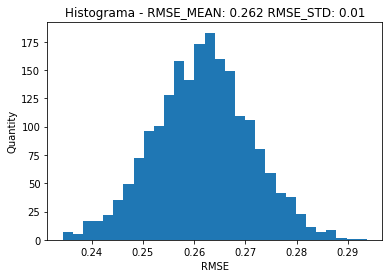

In [18]:
from sklearn.svm import SVR

start = time.time()

def regressao_svr():
    
    X = matriz_train
    y = vetor_train_target

    # Dividindo dados de treino
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33)

    # Criando Regressor SVR
    regr = SVR('linear')
    
    # Treino
    regr.fit(X_train, y_train.toarray().ravel()) 

    # Predição     
    y_pred = regr.predict(X_test)
    
    #Root mean squared error
    return np.sqrt(mean_squared_error(y_test.todense(), y_pred))

start = time.time()

rmse_list =[]

# Testando 2000 vezes através de amostras aleatórias
for i in range(2000):
    rmse = regressao_svr()
    rmse_list.append(rmse)

end = time.time()

print('Tempo de processamento do regressor SVR: '+str("%.2f" % (end - start))+'s\n')


print("\n")
print("RMSE MEAN: ","%.4f" % np.mean(rmse_list))
print("RMSE STD:  ","%.4f" % np.std(rmse_list))
print("\n")

plt.title(u"Histograma - RMSE_MEAN: " + str("%.3f" % np.mean(rmse_list))+ " RMSE_STD: " + str("%.2f" % np.std(rmse_list)))
plt.ylabel("Quantity")
plt.xlabel("RMSE")

plt.hist(rmse_list,bins =30)
plt.show()

# Utilizando regressor ridge em dados de teste

In [15]:

X_train = matriz_train
y_train = vetor_train_target
X_test  = matriz_test

# Criando Regressor Ridge
regr = Ridge(alpha = 29.0)

# Treino
regr.fit(X_train, y_train.toarray().ravel()) 

# Predição      
y_pred = regr.predict(X_test)

# Melhorando resultado
def fronteira(y):
    if y >1:
        return 1.0
    elif y <0:
        return 0.0
    else:
        return y
    
y_pred = np.array(list(map(fronteira, y_pred)))


# Salvando o resultado

In [5]:
df_test_item_id  = pd.read_csv('./data/test.csv' , encoding='utf8')['item_id'].head(y_pred.shape[0])
df_y_pred = pd.DataFrame(y_pred, columns = ['deal_probability'])
df_resultado = pd.concat([df_test_item_id,df_y_pred],axis =1)
df_resultado.to_csv('submission.csv', encoding='utf-8', index=False)